# Workbook analyzing DIGITS dataset from scikit-learn using K Nearest Neighbours Classifier

Authors:

        Fco Rafael Tendero Jiménez 
        Fco Javier Rodríguez Sánchez

1. Election of dataset: Digits dataset is going to be used.
This is a classification dataset where each data-point is a 8x8 image image of a digit.

In [1]:
from sklearn.datasets import load_digits
digits = load_digits()

<Figure size 432x288 with 0 Axes>

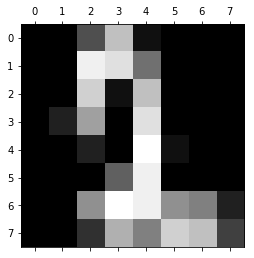

In [3]:
# An example of the data:
import matplotlib.pyplot as plt
plt.gray()
plt.matshow(digits.images[12])
plt.show()

Note that num features is 64 because it's a 8x8 image, now we print then number of observations and features)

In [4]:
# Data is a dictionary. We can then navigate through the dataset using the keys
digits.keys()
X = digits['data']
y = digits['target']

print("(number of observations, number of features): "+ str(X.shape))

# Classes: (each one of the 10 class is a digit from 0 to 9
classes = digits['target_names']

# Number of samples per class
for i in classes:
    print("Num of digit '" + str(i) + "' samples: " + str(sum(y == i)))

(number of observations, number of features): (1797, 64)
Num of digit '0' samples: 178
Num of digit '1' samples: 182
Num of digit '2' samples: 177
Num of digit '3' samples: 183
Num of digit '4' samples: 181
Num of digit '5' samples: 182
Num of digit '6' samples: 181
Num of digit '7' samples: 179
Num of digit '8' samples: 174
Num of digit '9' samples: 180


Now, we split the dataset where 80% of the data is used for training, and 20% for test. K Nearest Neighbors Classifier is going to be used.

In [5]:
# the dataset is split so that 80% of the data is used for training, and 20% for test.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

# K Nearest Neighbors Classifier is going to be used
from sklearn.neighbors import KNeighborsClassifier
myKNN = KNeighborsClassifier()

# required imports for performing grid search cross validation and stratified k fold technique.
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

# A param grid dictionary is created with the parameters to try in the cross-validation process
param_grid = {'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15]}

# KNN estimator, accuracy as scoring, and the data will be split into 10 chunks, thus, it will take 10 iterations
myGSCV = GridSearchCV(estimator=myKNN, param_grid=param_grid, scoring='accuracy',
                      cv=StratifiedKFold(n_splits=10, random_state=3))

# Training of the model
myGSCV.fit(X_train, y_train)

# prediction (using best_estimator_ by default)
y_pred = myGSCV.predict(X_test)

# Results
print("\nBest Estimator:\n" + str(myGSCV.best_estimator_))  # best estimator
print("\nParameters of best estimator:\n" + str(myGSCV.best_params_))   # parameters of the best estimator
print("\nTraining score: " + str(myGSCV.best_score_))  # training score for achieved with the best estimator
print("Test score: " + str(myGSCV.score(X_test, y_test)))  # test score


Best Estimator:
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

Parameters of best estimator:
{'n_neighbors': 1}

Training score: 0.9895615866388309
Test score: 0.9861111111111112


Using the best parameters for KNeighborsClassifier. About the training data we obtain as accuracy 0.98956 and on the test data we obtain as accuracy 0.98611. Therefore, we obtain a high precision.

4. Using Leave one out validation.
Now, in each iteration of the cross validation process, all observations except one will be used for training.
This means that, in the first iteration, observation #1 is out, in second iteration, observation #2 is out, and so on.
Thus, there will be as many iterations as training samples (length of X_train), which means a high computational cost.


In [6]:
from sklearn.model_selection import LeaveOneOut
myLOO = GridSearchCV(estimator=myKNN, param_grid=param_grid, scoring='accuracy', cv=LeaveOneOut(), verbose=2, n_jobs=-1)

# Training of the model
myLOO.fit(X_train, y_train)

# prediction (using best_estimator_ by default)
y_predLOO = myLOO.predict(X_test)

# Results
print("\nBest Estimator:\n" + str(myLOO.best_estimator_))   # best estimator
print("\nParameters of best estimator:\n" + str(myLOO.best_params_))    # parameters of the best estimator
print("\nTraining score: " + str(myLOO.best_score_))  # training score for achieved with the best estimator
print("Test score: " + str(myLOO.score(X_test, y_test)))  # test score

Fitting 1437 folds for each of 8 candidates, totalling 11496 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   19.3s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   38.7s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 3273 tasks      | elapsed: 11.4min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 15.2min
[Parallel(n_jobs=-1)]: Done 4893 tasks      | elapsed: 19.4min
[Parallel(n_jobs=-1)]: Done 5824 tasks      | elapsed: 22.8min
[Parallel(n_jobs=-1)]: Done 6837 tasks      | elapsed: 26.1min
[Parallel(n_jobs=-1)]: Done 7930 tasks      | elapsed: 29.7min
[Parallel(n_jobs=-1)]: Done 9105 tasks      | 


Best Estimator:
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

Parameters of best estimator:
{'n_neighbors': 1}

Training score: 0.9895615866388309
Test score: 0.9861111111111112


Using Leave one out validation about the training data we obtain as accuracy 0.98956 and on the test data we obtain as accuracy 0.98611. Therefore, we obtain a high precision.

5. Stratified K Fold.
There is a similar number of samples per each class, so, if this distribution is preserved when
splitting into training (X_train) and (X_test), stratification is not indispensable.

In [7]:

print('Classes distribution in Training')
for i in classes:
    print("Num of digit '" + str(i) + "' samples: " + str(sum(y_train == i)))

print('\nClasses distribution in Test')
for i in classes:
    print("Num of digit '" + str(i) + "' samples: " + str(sum(y_test == i)))

# KNN estimator, accuracy as scoring, and the data will be split into 10 chunks, thus, it will take 10 iterations
from sklearn.model_selection import KFold

myGSCV_noStrat = GridSearchCV(estimator=myKNN, param_grid=param_grid, scoring='accuracy',
                              cv=KFold(n_splits=10, random_state=3))

# Training of the model
myGSCV_noStrat.fit(X_train, y_train)

# prediction (using best_estimator_ by default)
y_pred_noStrat = myGSCV_noStrat.predict(X_test)

# Results. It's shown how the score is not affected when not using Stratified KFOLD
print("\nBest Estimator:\n" + str(myGSCV_noStrat.best_estimator_))  # best estimator
print("\nParameters of best estimator:\n" + str(myGSCV_noStrat.best_params_))   # parameters of the best estimator
print("\nTraining score: " + str(myGSCV_noStrat.best_score_))  # training score for achieved with the best estimator
print("Test score: " + str(myGSCV_noStrat.score(X_test, y_test)))  # test score

Classes distribution in Training
Num of digit '0' samples: 148
Num of digit '1' samples: 145
Num of digit '2' samples: 139
Num of digit '3' samples: 146
Num of digit '4' samples: 143
Num of digit '5' samples: 137
Num of digit '6' samples: 139
Num of digit '7' samples: 153
Num of digit '8' samples: 140
Num of digit '9' samples: 147

Classes distribution in Test
Num of digit '0' samples: 30
Num of digit '1' samples: 37
Num of digit '2' samples: 38
Num of digit '3' samples: 37
Num of digit '4' samples: 38
Num of digit '5' samples: 45
Num of digit '6' samples: 42
Num of digit '7' samples: 26
Num of digit '8' samples: 34
Num of digit '9' samples: 33

Best Estimator:
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

Parameters of best estimator:
{'n_neighbors': 1}

Training score: 0.9895615866388309
Test score: 0.9861111111111112


Also, we get a high precission.

6. Distance Weights
uniform weights (default): all points in each neighborhood have same weight (used in exercise 3)
distance weights: points closer to the evaluated will have more influence.

In [8]:
param_grid = {'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15], 'weights': ['uniform', 'distance']}

# KNN estimator, accuracy as scoring, and the data will be split into 10 chunks, thus, it will take 10 iterations

myGSCV_w = GridSearchCV(estimator=myKNN, param_grid=param_grid, scoring='accuracy',

                        cv=StratifiedKFold(n_splits=10, random_state=3))


# Training of the model
myGSCV_w.fit(X_train, y_train)


# prediction (using best_estimator_ by default)

y_pred_w = myGSCV_w.predict(X_test)


# Results. Note that distance weights are preferred

print("\nBest Estimator:\n" + str(myGSCV_w.best_estimator_))  # best estimator

print("\nParameters of best estimator:\n" + str(myGSCV_w.best_params_))   # parameters of the best estimator

print("\nTraining score: " + str(myGSCV_w.best_score_))  # training score for achieved with the best estimator

print("Test score: " + str(myGSCV_w.score(X_test, y_test)))  # test score



Best Estimator:
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='distance')

Parameters of best estimator:
{'n_neighbors': 3, 'weights': 'distance'}

Training score: 0.9902574808629089
Test score: 0.9805555555555555


7. Testing different metrics.
The default metric used is minkowski. Now euclidean and manhattan metrics will be taken into account, thus, they will
be included in the param grid.

In [11]:
"""
Also, the value 1 and 2 for the parameter 'p' are manhattan and euclidean metrics and for minkowski, a parameter 'p' can be adjusted, so the different values will also be included.
"""
param_grid = {'n_neighbors': [1, 3, 5, 7, 9, 11, 13],
              'weights': ['uniform', 'distance'],
              'p': [1, 2, 3, 4, 5, 6, 7, 8, 9]}

myGSCV_m = GridSearchCV(estimator=myKNN, param_grid=param_grid, scoring='accuracy',
                        cv=StratifiedKFold(n_splits=10, random_state=3))

# Training of the model
myGSCV_m.fit(X_train, y_train)

# prediction (using best_estimator_ by default)
y_pred_m = myGSCV_m.predict(X_test)

# Results
print("\nBest Estimator:\n" + str(myGSCV_m.best_estimator_))  # best estimator
print("\nParameters of best estimator:\n" + str(myGSCV_m.best_params_))   # parameters of the best estimator
print("\nTraining score: " + str(myGSCV_m.best_score_))  # training score for achieved with the best estimator
print("Test score: " + str(myGSCV_m.score(X_test, y_test)))  # test score


Best Estimator:
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=3,
           weights='uniform')

Parameters of best estimator:
{'n_neighbors': 1, 'p': 3, 'weights': 'uniform'}

Training score: 0.9902574808629089
Test score: 0.9833333333333333


The parameters of the best stimator are 1 neihbors and p = '3' with minkowski metrc and weights uniform. Finally we get a 0.98 about test data and 0.99 for training data.

8. Now, let's repeat the previous sections with the following data.

QSAR DATASET: https://archive.ics.uci.edu/ml/datasets/QSAR+biodegradation

In [15]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Importing csv dataset into a numpy structure (2)
X = np.genfromtxt('data/biodeg.csv', delimiter=";", skip_header=0, usecols=range(0, 41))    #1055x41
y = np.genfromtxt('data/biodeg.csv', delimiter=";", skip_header=0, usecols=-1, dtype=str)   #1055x1


# (number of observations, number of features)
print("(number of observations, number of features): "+ str(X.shape))

# classes:
classes = ["RB", "NRB"]   # Ready-Biodegradable, Not Ready-Biodegradable


# number of samples per class
for i in classes:
    print("Num of Classes '" + str(i) + "' samples: " + str(sum(y == i)))

(number of observations, number of features): (1055, 41)
Num of Classes 'RB' samples: 356
Num of Classes 'NRB' samples: 699


The dataset is split so that 80% of the data is used for training, and 20% for test and K Nearest Neighbors Classifier is going to be used.

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

# K Nearest Neighbors Classifier is going to be used
from sklearn.neighbors import KNeighborsClassifier
myKNN = KNeighborsClassifier()

# required imports for performing grid search cross validation and stratified k fold technique.
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

# A param grid dictionary is created with the parameters to try in the cross-validation process
param_grid = {'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15]}

# KNN estimator, accuracy as scoring, and the data will be split into 10 chunks, thus, it will take 10 iterations
myGSCV = GridSearchCV(estimator=myKNN, param_grid=param_grid, scoring='accuracy',
                      cv=StratifiedKFold(n_splits=10, random_state=3))

# Training of the model
myGSCV.fit(X_train, y_train)

# prediction (using best_estimator_ by default)
y_pred = myGSCV.predict(X_test)

# Results
print("\nBest Estimator:\n" + str(myGSCV.best_estimator_))  # best estimator
print("\nParameters of best estimator:\n" + str(myGSCV.best_params_))   # parameters of the best estimator
print("\nTraining score: " + str(myGSCV.best_score_))  # training score for achieved with the best estimator
print("Test score: " + str(myGSCV.score(X_test, y_test)))  # test score


Best Estimator:
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='uniform')

Parameters of best estimator:
{'n_neighbors': 7}

Training score: 0.8139810426540285
Test score: 0.8293838862559242


/home/master/Aplicaciones/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Through KNeighborsClassifier we get over training data 0.81 accuracy and over the test data 0.83. The parameters over the best configurations are 7 neighbors.

Using Leave one out validation.
Now, in each iteration of the cross validation process, all observations except one will be used for training.

In [17]:
from sklearn.model_selection import LeaveOneOut
myLOO = GridSearchCV(estimator=myKNN, param_grid=param_grid, scoring='accuracy', cv=LeaveOneOut(), verbose=2, n_jobs=-1)

# Training of the model
myLOO.fit(X_train, y_train)

# prediction (using best_estimator_ by default)
y_predLOO = myLOO.predict(X_test)

# Results
print("\nBest Estimator:\n" + str(myLOO.best_estimator_))   # best estimator
print("\nParameters of best estimator:\n" + str(myLOO.best_params_))    # parameters of the best estimator
print("\nTraining score: " + str(myLOO.best_score_))  # training score for achieved with the best estimator
print("Test score: " + str(myLOO.score(X_test, y_test)))  # test score

Fitting 844 folds for each of 8 candidates, totalling 6752 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 493 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done 1305 tasks      | elapsed:   29.6s
[Parallel(n_jobs=-1)]: Done 2437 tasks      | elapsed:   60.0s
[Parallel(n_jobs=-1)]: Done 3897 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 5677 tasks      | elapsed:  2.6min



Best Estimator:
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

Parameters of best estimator:
{'n_neighbors': 3}

Training score: 0.8104265402843602
Test score: 0.8246445497630331


[Parallel(n_jobs=-1)]: Done 6752 out of 6752 | elapsed:  3.2min finished


We get over training data 0.81 accuracy and over the test data 0.82. The parameters over the best configurations are 3 neighbors, with uniforms weights, p = 2 and minkowski metric.

Stratified K Fold.
There is a similar number of samples per each class, so, if this distribution is preserved when
splitting into training (X_train) and (X_test), stratification is not indispensable.

In [18]:
print('Classes distribution in Training')
for i in classes:
    print("Num of digit '" + str(i) + "' samples: " + str(sum(y_train == i)))

print('\nClasses distribution in Test')
for i in classes:
    print("Num of digit '" + str(i) + "' samples: " + str(sum(y_test == i)))

# Let's try then with KFold (no Stratified)
# KNN estimator, accuracy as scoring, and the data will be split into 10 chunks, thus, it will take 10 iterations
from sklearn.model_selection import KFold

myGSCV_noStrat = GridSearchCV(estimator=myKNN, param_grid=param_grid, scoring='accuracy',
                              cv=KFold(n_splits=10, random_state=3))

# Training of the model
myGSCV_noStrat.fit(X_train, y_train)

# prediction (using best_estimator_ by default)
y_pred_noStrat = myGSCV_noStrat.predict(X_test)

# Results. It's shown how the score is not affected when not using Stratified KFOLD
print("\nBest Estimator:\n" + str(myGSCV_noStrat.best_estimator_))  # best estimator
print("\nParameters of best estimator:\n" + str(myGSCV_noStrat.best_params_))   # parameters of the best estimator
print("\nTraining score: " + str(myGSCV_noStrat.best_score_))  # training score for achieved with the best estimator
print("Test score: " + str(myGSCV_noStrat.score(X_test, y_test)))  # test score

Classes distribution in Training
Num of digit 'RB' samples: 291
Num of digit 'NRB' samples: 553

Classes distribution in Test
Num of digit 'RB' samples: 65
Num of digit 'NRB' samples: 146

Best Estimator:
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

Parameters of best estimator:
{'n_neighbors': 3}

Training score: 0.8127962085308057
Test score: 0.8246445497630331


We get over training data 0.81 accuracy and over the test data 0.82. 

Distance Weights uniform weights (default): all points in each neighborhood have same weight (used in exercise 3)
distance weights: points closer to the evaluated will have more influence.

In [19]:
param_grid = {'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15], 'weights': ['uniform', 'distance']}
# KNN estimator, accuracy as scoring, and the data will be split into 10 chunks, thus, it will take 10 iterations
myGSCV_w = GridSearchCV(estimator=myKNN, param_grid=param_grid, scoring='accuracy',
                        cv=StratifiedKFold(n_splits=10, random_state=3))

# Training of the model
myGSCV_w.fit(X_train, y_train)

# prediction (using best_estimator_ by default)
y_pred_w = myGSCV_w.predict(X_test)

# Results. Note that distance weights are preferred
print("\nBest Estimator:\n" + str(myGSCV_w.best_estimator_))  # best estimator
print("\nParameters of best estimator:\n" + str(myGSCV_w.best_params_))   # parameters of the best estimator
print("\nTraining score: " + str(myGSCV_w.best_score_))  # training score for achieved with the best estimator
print("Test score: " + str(myGSCV_w.score(X_test, y_test)))  # test score


Best Estimator:
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='distance')

Parameters of best estimator:
{'n_neighbors': 7, 'weights': 'distance'}

Training score: 0.8246445497630331
Test score: 0.8246445497630331


/home/master/Aplicaciones/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


We get over training data 0.82 accuracy and over the test data 0.82.

Testing different metrics.
The default metric used is minkowski. Now euclidean and manhattan metrics will be taken into account, thus, they will
be included in the param grid.
Also, for minkowski, a parameter 'p' can be adjusted, so the different values will also be included.

In [20]:
param_grid = {'n_neighbors': [1, 3, 5, 7, 9, 11, 13],
              'weights': ['uniform', 'distance'],
              'metric': ['euclidean', 'manhattan', 'minkowski'],
              'p': [2, 3, 4, 5, 6, 7, 8, 9]}

myGSCV_m = GridSearchCV(estimator=myKNN, param_grid=param_grid, scoring='accuracy',
                        cv=StratifiedKFold(n_splits=10, random_state=3))

# Training of the model
myGSCV_m.fit(X_train, y_train)

# prediction (using best_estimator_ by default)
y_pred_m = myGSCV_m.predict(X_test)

# Results
print("\nBest Estimator:\n" + str(myGSCV_m.best_estimator_))  # best estimator
print("\nParameters of best estimator:\n" + str(myGSCV_m.best_params_))   # parameters of the best estimator
print("\nTraining score: " + str(myGSCV_m.best_score_))  # training score for achieved with the best estimator
print("Test score: " + str(myGSCV_m.score(X_test, y_test)))  # test score


Best Estimator:
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='distance')

Parameters of best estimator:
{'metric': 'manhattan', 'n_neighbors': 7, 'p': 2, 'weights': 'distance'}

Training score: 0.8376777251184834
Test score: 0.8341232227488151


/home/master/Aplicaciones/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


We get over training data 0.84 accuracy and over the test data 0.83.